# Mushroom Analysis

In [2]:
import pandas as pd

from collections import Counter
import matplotlib.pyplot as plt

In [3]:
fungi_df = pd.read_csv("mushroom_morphbox.csv")
fungi_df.head()

,scientific name,common names,hymenium type,cap shape,gill type,stipe type,spore color,ecological type,edible,URL
0,amanita muscaria,"fly agaric,fly amanita",gills,"convex, flat",free,"ring,volva",white,mycorrhizal,"poisonous, psychoactive",https://en.wikipedia.org/wiki/Amanita_muscaria
1,psilocybe cubensis,"magic mushroom,shroom,golden halo,golden teach...",gills,"convex, flat","adnate, adnexed",ring,purple,saprotrophic,psychoactive,https://en.wikipedia.org/wiki/Psilocybe_cubensis
2,lentinula edodes,"shiitake,chinquapin,chinese/black forest mushr...",gills,convex,free,bare,"white, buff",saprotrophic,choice,https://en.wikipedia.org/wiki/Shiitake
3,amanita phalloides,death cap,gills,"convex, flat",free,"ring,volva",white,mycorrhizal,deadly,https://en.wikipedia.org/wiki/Amanita_phalloides
4,cantharellus,chanterelles,ridges,infundibuliform,decurrent,bare,yellow,mycorrhizal,"choice, edible",https://en.wikipedia.org/wiki/Cantharellus


In [4]:
def plot_unique(column_title=None):
    # count all unique instances, ignored when a column has multiple instances, count each
    column_lst = fungi_df[column_title].tolist()
    full_lst = ",".join(column_lst).replace(" ", "")
    if column_title == "spore color":
        full_lst = full_lst.replace("buff", "white")
        full_lst = full_lst.replace("blackish-brown", "brown")
        full_lst = full_lst.replace("cream", "white")
        full_lst = full_lst.replace("purple-black", "purple")
        full_lst = full_lst.replace("purple-brown", "purple")
        full_lst = full_lst.replace("tan", "brown")
        full_lst = full_lst.replace("olive-brown", "green")
        full_lst = full_lst.replace("olive", "green")
        full_lst = full_lst.replace("reddish-brown", "brown")
        full_lst = full_lst.replace("blackish-brown", "brown")
        full_lst = full_lst.replace("yellow-brown", "yellow")
        full_lst = full_lst.replace("yellow-orange", "yellow")
        full_lst = full_lst.replace("pinkish-brown", "pink")
        full_lst = full_lst.replace("salmon", "pink")      
        full_lst = full_lst.replace("ochre", "yellow")
    if column_title == "edible":
        full_lst = full_lst.replace("allergic", "allergenic")
        full_lst = full_lst.replace("unpalatable", "inedible")
        full_lst = full_lst.replace("notrecommended", "inedible")
        full_lst = full_lst.replace("toohardtoeat", "inedible")
        
    full_lst = full_lst.split(",")
    counter = Counter(full_lst)
    print(counter)

    # bar chart
    '''
    plt.xticks(rotation=90)
    plt.title(column_title.title())
    plt.bar(counter.keys(), counter.values())
    plt.show()
    '''
    
    # pie chart
    fig, ax = plt.subplots(figsize=(8, 8))
    color_choice = None
    if column_title == "spore color":
        color_choice = counter.keys()
    ax.pie(counter.values(), labels=counter.keys(), colors=color_choice,
          wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 2, 
                      'antialiased': True})
    labels = [f"{value}: {count}" for value, count in zip(counter.keys(), counter.values())]
    plt.legend(loc="upper right", labels=labels)
    plt.title(column_title.title())
    plt.tight_layout()
    plt.show()

Counter({'gills': 706, 'pores': 136, 'smooth': 53, 'glebal': 49, 'ridges': 32, 'teeth': 16})


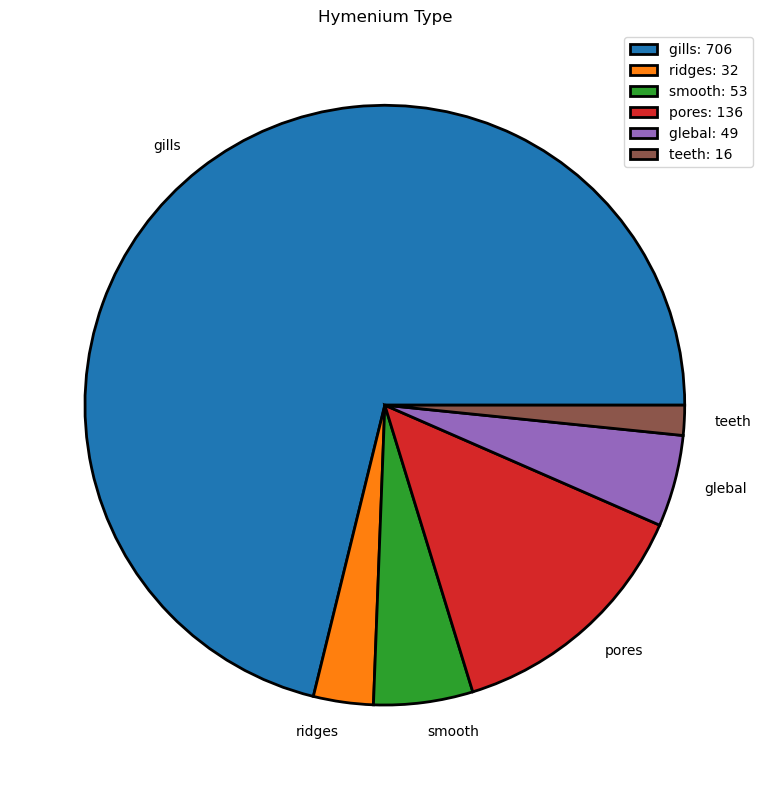

In [5]:
#print(fungi_df.value_counts("hymenium type"))
#fungi_df.value_counts("hymenium type").plot(kind="bar", title="Hymenium Type")
plot_unique("hymenium type")

Counter({'convex': 563, 'flat': 250, 'conical': 134, 'none': 99, 'depressed': 90, 'campanulate': 89, 'umbonate': 75, 'infundibuliform': 50, 'offset': 31, 'ovate': 21, 'umbilicate': 3})


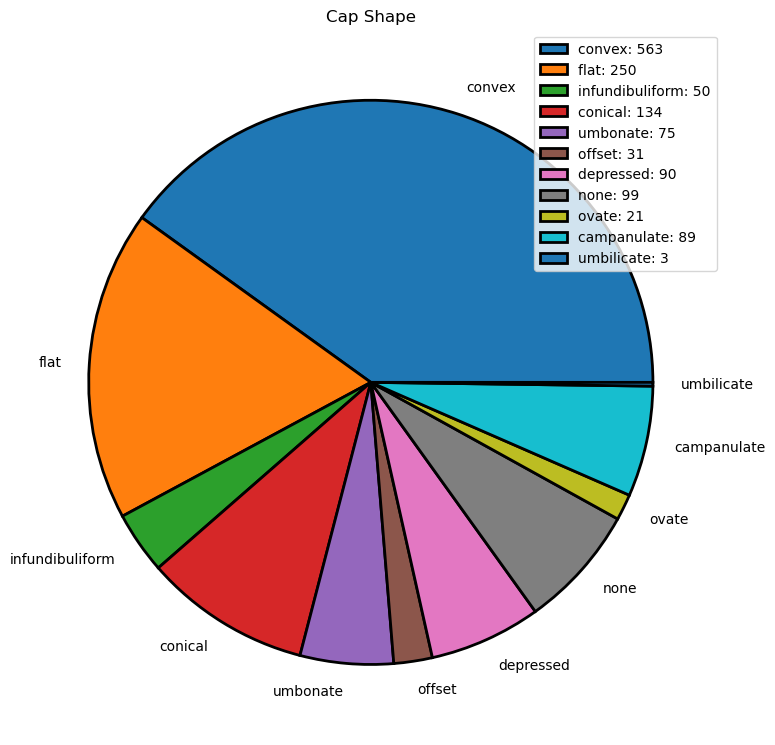

In [6]:
#print(fungi_df.value_counts("cap shape"))
#fungi_df.value_counts("cap shape").plot(kind="bar", title="Cap Shape")
plot_unique("cap shape")

Counter({'adnate': 330, 'free': 272, 'decurrent': 187, 'adnexed': 153, 'none': 143, 'sinuate': 23, 'subdecurrent': 11, 'emarginate': 9, 'seceding': 7})


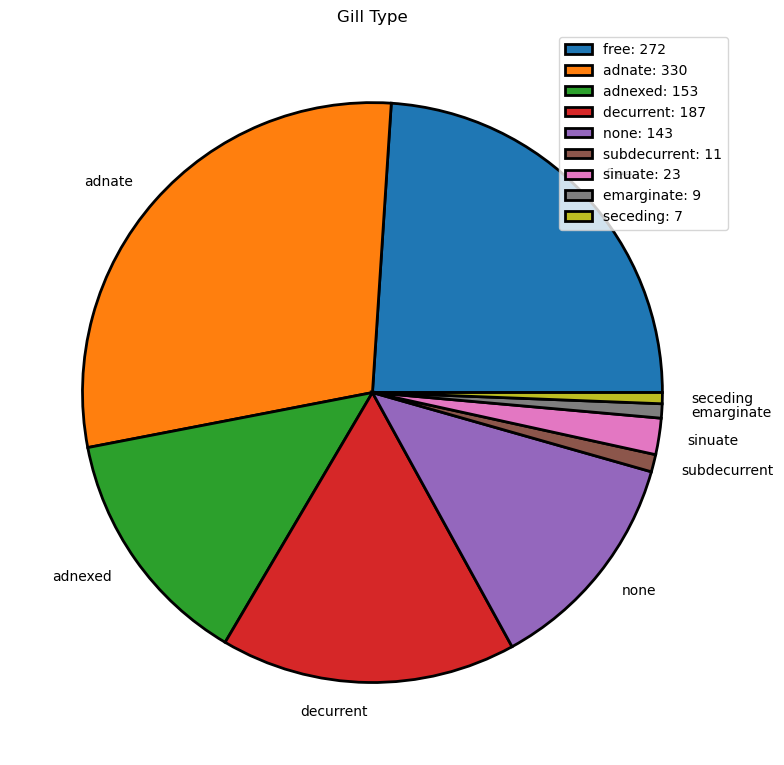

In [7]:
#print(fungi_df.value_counts("gill type"))
#fungi_df.value_counts("gill type").plot(kind="bar", title="Gill Type")
plot_unique("gill type")

Counter({'bare': 582, 'ring': 260, 'volva': 107, 'none': 99, 'cortina': 26})


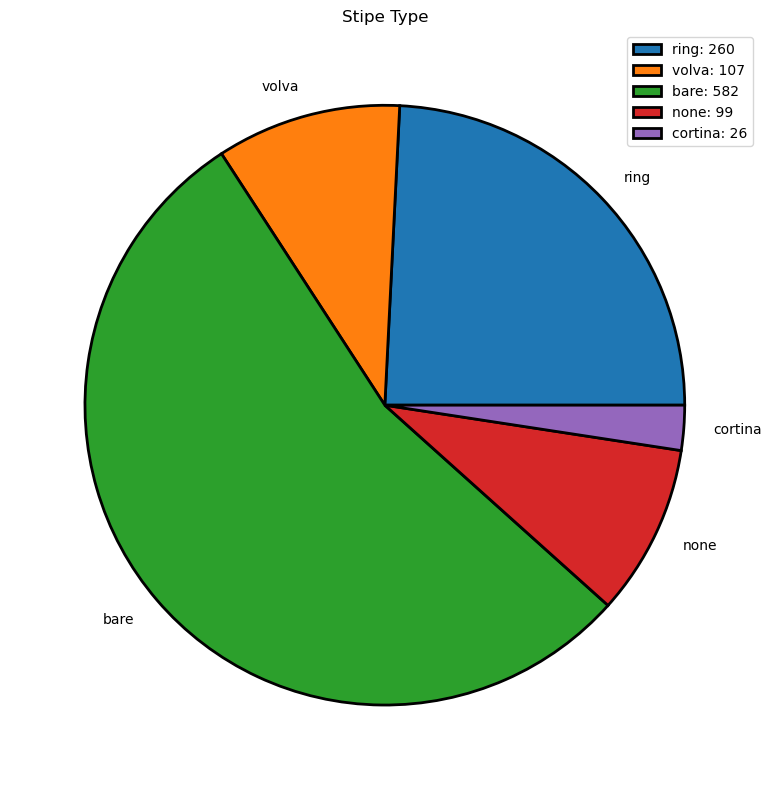

In [8]:
#print(fungi_df.value_counts("stipe type"))
#fungi_df.value_counts("stipe type").plot(kind="bar", title="Stipe Type")
plot_unique("stipe type")

Counter({'white': 570, 'brown': 219, 'yellow': 90, 'green': 74, 'purple': 67, 'pink': 49, 'black': 36})


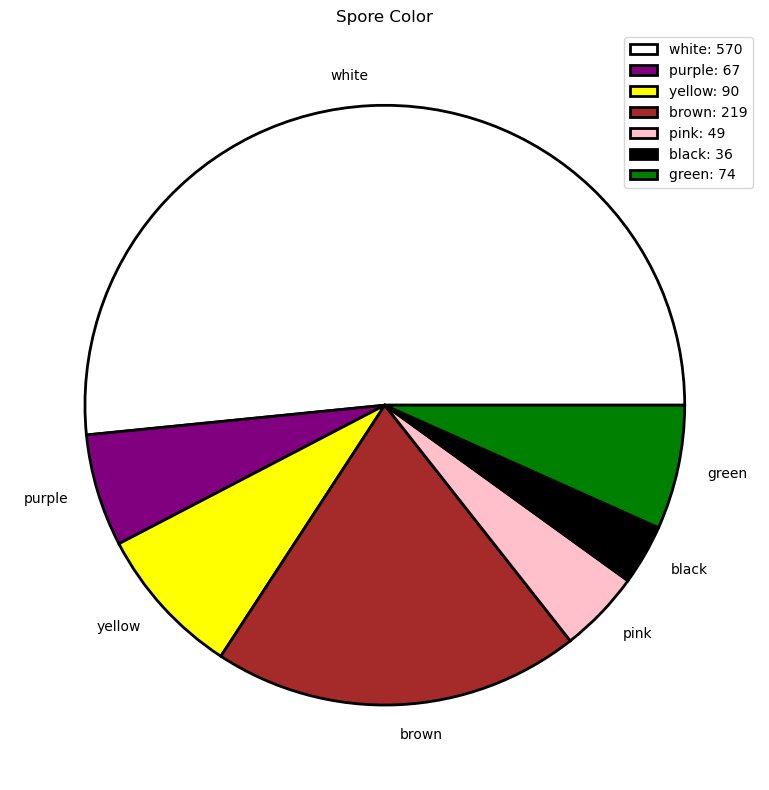

In [9]:
#print(fungi_df.value_counts("spore color"))
#plot_unique("hymenium type")fungi_df.value_counts("spore color").plot(kind="bar", title="Spore Color")
plot_unique("spore color")

Counter({'saprotrophic': 552, 'mycorrhizal': 427, 'parasitic': 55})


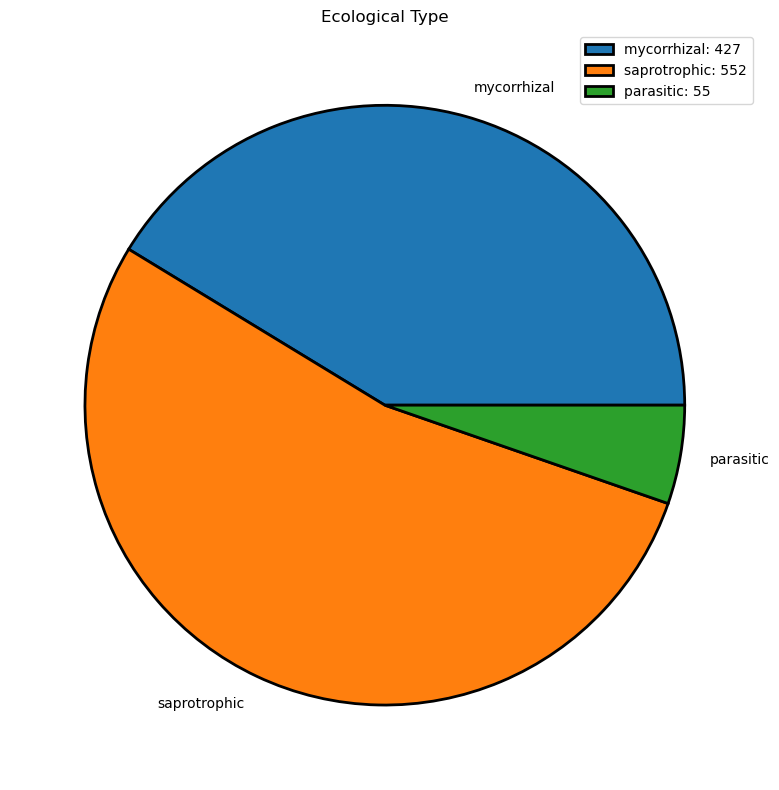

In [10]:
#print(fungi_df.value_counts("ecological type"))
#fungi_df.value_counts("ecological type").plot(kind="bar", title="Ecological Type")
plot_unique("ecological type")

Counter({'unknown': 301, 'inedible': 286, 'edible': 226, 'choice': 110, 'poisonous': 95, 'psychoactive': 73, 'deadly': 35, 'allergenic': 9})


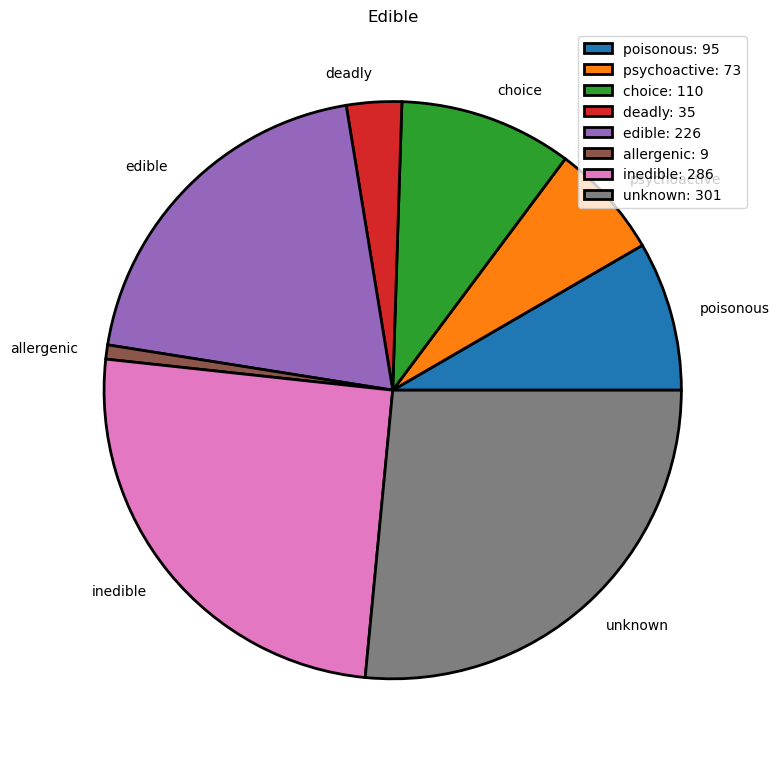

In [11]:
#print(fungi_df.value_counts("edible"))
#fungi_df.value_counts("edible").plot(kind="bar", title="edible")
plot_unique("edible")